## Observations and Insights 

In [1]:
%matplotlib inline

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='outer')
# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [72]:
# Checking the number of mice.
len(df['Mouse ID'])

1893

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df2 = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
df2.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [75]:
# Checking the number of mice in the clean DataFrame.
len(df2['Mouse ID'])

1888

In [76]:
df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_df = df2.groupby(['Drug Regimen'])

mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
std_deviation = group_df['Tumor Volume (mm3)'].std()
std_error = group_df['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({'Mean':mean, 
                            'Median':median,
                            'Variance':variance,
                            'Std Deviation': std_deviation,
                            'Std Error': std_error})

sum_stats

,Mean,Median,Variance,Std Deviation,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Count for all mice tested for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

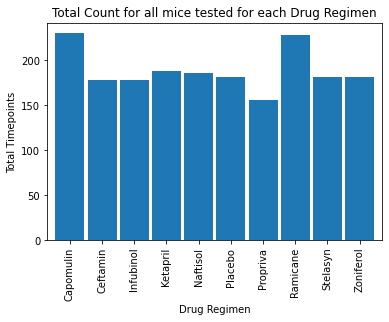

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

barplot = group_df['Timepoint'].count()
barplot.plot(kind='bar',width=0.9,xlabel='Drug Regimen',ylabel='Total Timepoints', title= "Total Count for all mice tested for each Drug Regimen")

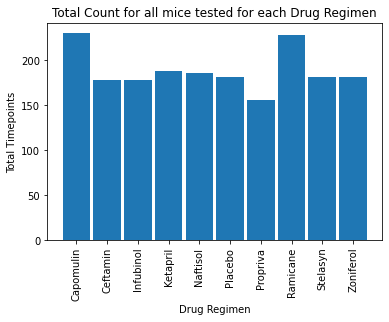

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barplot_df = pd.DataFrame(barplot)
barplot_df = barplot_df.reset_index()
x_axis = barplot_df['Drug Regimen'].to_list()
y_axis = barplot_df['Timepoint'].to_list()

plt.bar(x_axis,y_axis, width=0.9)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title("Total Count for all mice tested for each Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Percentage Distribution of Male and Female Mice'}, ylabel='Sex'>

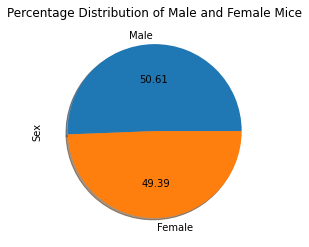

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot = df['Sex'].value_counts()
pieplot.plot(kind='pie',autopct='%.2f', shadow=True, title='Percentage Distribution of Male and Female Mice')

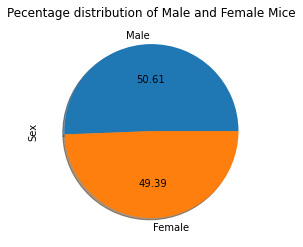

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pieplot, shadow=True, labels=['Male','Female'], autopct='%.2f')
plt.ylabel('Sex')
plt.title('Pecentage distribution of Male and Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
